# Importing the Libraries

In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 

# Loading the data 

In [2]:
df = pd.read_csv('D:\Malhar H Jadhav\Zep Intern\Task 2\Web Scrapping of Cars24\Data\Cars24_Scrapped_Data.csv')

In [3]:
df.head()

,City,Year,Brand,Car Name,Car model,Car Price,Car km,Owner,Car Type,Car link
0,Pune,2021,Nissan,MAGNITE,NaN,963799,"16,049",1,Petrol,https://www.cars24.com/buy-used-nissan-magnite...
1,Pune,2014,Volkswagen,Vento,Manual,513399,"41,569",1,Petrol,https://www.cars24.com/buy-used-volkswagen-ven...
2,Pune,2020,Tata,Tiago,Manual,680399,"8,118",1,Petrol,https://www.cars24.com/buy-used-tata-tiago-202...
3,Pune,2015,Renault,Duster,Manual,676799,"63,143",1,Diesel,https://www.cars24.com/buy-used-renault-duster...
4,Pune,2020,Maruti,Alto,Manual,395099,"2,530",1,Petrol,https://www.cars24.com/buy-used-maruti-alto-20...


In [4]:
df['Car km']=df['Car km'].replace(",","",regex=True)
df['Car km']=df['Car km'].astype(int)
df['Car km'].head()

0    16049
1    41569
2     8118
3    63143
4     2530
Name: Car km, dtype: int32

In [5]:
df.head(5).style.background_gradient(cmap='Greens',axis=None)

,City,Year,Brand,Car Name,Car model,Car Price,Car km,Owner,Car Type,Car link
0,Pune,2021,Nissan,MAGNITE,nan,963799,16049,1,Petrol,https://www.cars24.com/buy-used-nissan-magnite-2021-cars-mumbai-10351699795/
1,Pune,2014,Volkswagen,Vento,Manual,513399,41569,1,Petrol,https://www.cars24.com/buy-used-volkswagen-vento-2014-cars-mumbai-10371992797/
2,Pune,2020,Tata,Tiago,Manual,680399,8118,1,Petrol,https://www.cars24.com/buy-used-tata-tiago-2020-cars-pune-1037521668/
3,Pune,2015,Renault,Duster,Manual,676799,63143,1,Diesel,https://www.cars24.com/buy-used-renault-duster-2015-cars-mumbai-1034180265/
4,Pune,2020,Maruti,Alto,Manual,395099,2530,1,Petrol,https://www.cars24.com/buy-used-maruti-alto-2020-cars-pune-1240687206/


In [6]:
df.dtypes 

City         object
Year          int64
Brand        object
Car Name     object
Car model    object
Car Price     int64
Car km        int32
Owner         int64
Car Type     object
Car link     object
dtype: object

**`Observation:`**
Here we can understand what are the datatypes of columns present

**`Observation`**: Rows and Columns present in the data, we have 3437 Rows and 10 Columns present in the data 

In [7]:
df.describe().style.background_gradient(cmap='Greens',axis=None)

,Year,Car Price,Car km,Owner
count,3437.000000,3437.000000,3437.000000,3437.000000
mean,2017.121909,676535.634274,42477.444574,1.231015
std,2.226149,352650.445748,29501.251251,0.466757
min,2008.000000,198399.000000,71.000000,1.000000
25%,2016.000000,440299.000000,20478.000000,1.000000
50%,2017.000000,579499.000000,37774.000000,1.000000
75%,2019.000000,790799.000000,58498.000000,1.000000
max,2022.000000,3353899.000000,281380.000000,4.000000


In [8]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3437 entries, 0 to 3436
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       3437 non-null   object
 1   Year       3437 non-null   int64 
 2   Brand      3437 non-null   object
 3   Car Name   3437 non-null   object
 4   Car model  3390 non-null   object
 5   Car Price  3437 non-null   int64 
 6   Car km     3437 non-null   int32 
 7   Owner      3437 non-null   int64 
 8   Car Type   3437 non-null   object
 9   Car link   3437 non-null   object
dtypes: int32(1), int64(3), object(6)
memory usage: 255.2+ KB


In [9]:
df.columns

Index(['City', 'Year', 'Brand', 'Car Name', 'Car model', 'Car Price', 'Car km',
       'Owner', 'Car Type', 'Car link'],
      dtype='object')

In [10]:
df.shape 

(3437, 10)

In [11]:
df.isnull().sum() 

City          0
Year          0
Brand         0
Car Name      0
Car model    47
Car Price     0
Car km        0
Owner         0
Car Type      0
Car link      0
dtype: int64

In [12]:
df=df.dropna()
len(df)

3390

In [13]:
df.duplicated().sum() #Checking for Duplicate values

0

In [14]:
df

,City,Year,Brand,Car Name,Car model,Car Price,Car km,Owner,Car Type,Car link
1,Pune,2014,Volkswagen,Vento,Manual,513399,41569,1,Petrol,https://www.cars24.com/buy-used-volkswagen-ven...
2,Pune,2020,Tata,Tiago,Manual,680399,8118,1,Petrol,https://www.cars24.com/buy-used-tata-tiago-202...
3,Pune,2015,Renault,Duster,Manual,676799,63143,1,Diesel,https://www.cars24.com/buy-used-renault-duster...
4,Pune,2020,Maruti,Alto,Manual,395099,2530,1,Petrol,https://www.cars24.com/buy-used-maruti-alto-20...
6,Pune,2019,Jeep,Compass,Manual,1370199,27193,1,Petrol,https://www.cars24.com/buy-used-jeep-compass-2...
...,...,...,...,...,...,...,...,...,...,...
3432,Hyderabad,2021,Hyundai,VENUE,Automatic,1201799,16964,1,Petrol,https://www.cars24.com/buy-used-hyundai-venue-...
3433,Hyderabad,2017,Maruti,S Cross,Manual,734599,99312,2,Diesel,https://www.cars24.com/buy-used-maruti-s-cross...
3434,Hyderabad,2014,Hyundai,Grand i10,Manual,443999,65018,1,Petrol,https://www.cars24.com/buy-used-hyundai-grand-...
3435,Hyderabad,2019,Maruti,Dzire,Manual,752199,84773,1,Diesel,https://www.cars24.com/buy-used-maruti-dzire-2...


In [15]:
df['Brand'].nunique()

19

In [16]:
top5Brands=df['Brand'].value_counts().head() 

Text(0.5, 0, 'Most Number of Brands ')

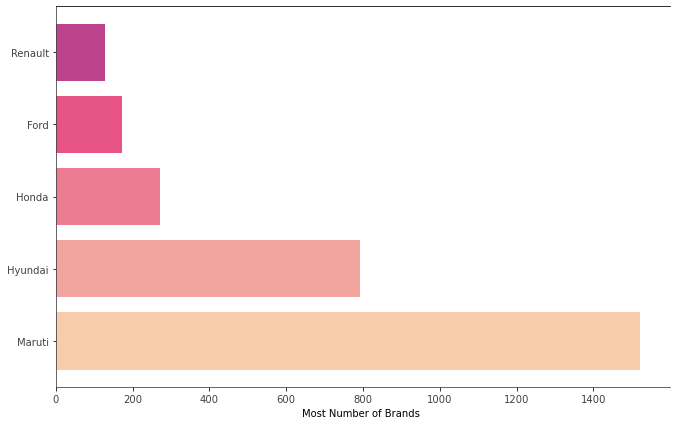

In [17]:
height = top5Brands.values
bars = top5Brands.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Most Number of Brands ")

In [18]:
top5City=df['City'].value_counts().head() 

Text(0.5, 0, 'Most Number of Brands ')

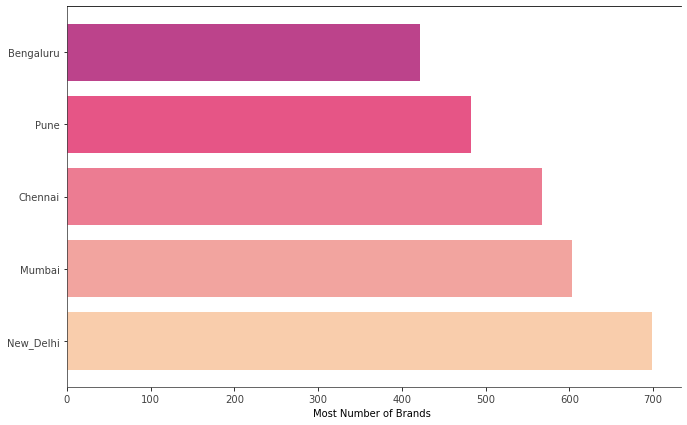

In [19]:
height = top5City.values
bars = top5City.index
y_pos = np.arange(len(bars))

fig = plt.figure(figsize=[11,7], frameon=False)
ax = fig.gca()
ax.spines["top"].set_visible("#424242")
ax.spines["right"].set_visible(False)
ax.spines["left"].set_color("#424242")
ax.spines["bottom"].set_color("#424242")

#colors = ["green","blue","magenta","cyan","gray"]
#random.shuffle(colors)
colors = ["#f9cdac","#f2a49f","#ec7c92","#e65586","#bc438b"]
plt.barh(y_pos, height, color=colors)

plt.xticks(color="#424242")

plt.yticks(y_pos, bars, color="#424242")
plt.xlabel("Most Number of Brands ")

In [20]:
df['Car Price'].min()

198399

In [21]:
df['Car Price'].max()

3353899

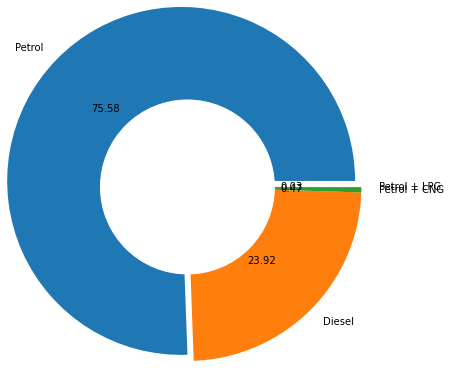

In [22]:
values=df['Car Type'].value_counts()
labels=df['Car Type'].unique().tolist()
explode=(0.1,0,0,0)
plt.pie(values, labels=labels, explode=explode, radius=2, autopct='%.2f')
my_circle=plt.Circle( (0,0), 1.0, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

([<matplotlib.patches.Wedge at 0x2b2899fbdc0>,
 [Text(-1.0203982508442198, 0.6314961675846158, 'Manual'),
  Text(0.9353650361749368, -0.5788715307401626, 'Automatic')],
 [Text(-0.5952323129924614, 0.3683727644243592, '82.36'),
  Text(0.5101991106408746, -0.31574810767645234, '17.64')])

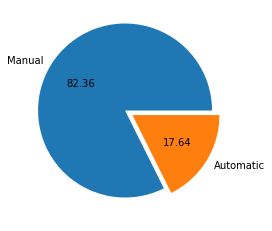

In [23]:
x=df["Car model"].value_counts()
label=['Manual','Automatic']
explode=(0.1,0)
plt.pie(x,labels=label,autopct='%.2f',explode=explode)

In [24]:
df['Year'].min()

2008

In [25]:
df['Year'].max()

2022

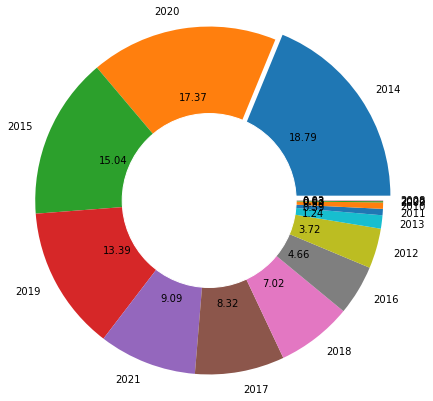

In [26]:
values=df['Year'].value_counts()
labels=df['Year'].unique().tolist()
explode=(0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0)
plt.pie(values, labels=labels, explode=explode, radius=2, autopct='%.2f')
my_circle=plt.Circle( (0,0), 1.0, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

In [27]:
New_df=df.drop(['Car link'], axis=1)
New_df.head()

,City,Year,Brand,Car Name,Car model,Car Price,Car km,Owner,Car Type
1,Pune,2014,Volkswagen,Vento,Manual,513399,41569,1,Petrol
2,Pune,2020,Tata,Tiago,Manual,680399,8118,1,Petrol
3,Pune,2015,Renault,Duster,Manual,676799,63143,1,Diesel
4,Pune,2020,Maruti,Alto,Manual,395099,2530,1,Petrol
6,Pune,2019,Jeep,Compass,Manual,1370199,27193,1,Petrol


In [28]:
len(New_df)

3390

In [29]:
New_df['Car Name'] = New_df['Brand'].str.cat(New_df['Car Name'],sep=" ")
New_df

,City,Year,Brand,Car Name,Car model,Car Price,Car km,Owner,Car Type
1,Pune,2014,Volkswagen,Volkswagen Vento,Manual,513399,41569,1,Petrol
2,Pune,2020,Tata,Tata Tiago,Manual,680399,8118,1,Petrol
3,Pune,2015,Renault,Renault Duster,Manual,676799,63143,1,Diesel
4,Pune,2020,Maruti,Maruti Alto,Manual,395099,2530,1,Petrol
6,Pune,2019,Jeep,Jeep Compass,Manual,1370199,27193,1,Petrol
...,...,...,...,...,...,...,...,...,...
3432,Hyderabad,2021,Hyundai,Hyundai VENUE,Automatic,1201799,16964,1,Petrol
3433,Hyderabad,2017,Maruti,Maruti S Cross,Manual,734599,99312,2,Diesel
3434,Hyderabad,2014,Hyundai,Hyundai Grand i10,Manual,443999,65018,1,Petrol
3435,Hyderabad,2019,Maruti,Maruti Dzire,Manual,752199,84773,1,Diesel


In [30]:
New_df.to_csv('Cars24_Cleaned.csv')

# Modeling

In [31]:
New_df=pd.read_csv("Cars24_Cleaned.csv")

In [32]:
X=New_df.drop(columns=['Car Price','Unnamed: 0'])
Y=New_df['Car Price']

In [33]:
X

,City,Year,Brand,Car Name,Car model,Car km,Owner,Car Type
0,Pune,2014,Volkswagen,Volkswagen Vento,Manual,41569,1,Petrol
1,Pune,2020,Tata,Tata Tiago,Manual,8118,1,Petrol
2,Pune,2015,Renault,Renault Duster,Manual,63143,1,Diesel
3,Pune,2020,Maruti,Maruti Alto,Manual,2530,1,Petrol
4,Pune,2019,Jeep,Jeep Compass,Manual,27193,1,Petrol
...,...,...,...,...,...,...,...,...
3385,Hyderabad,2021,Hyundai,Hyundai VENUE,Automatic,16964,1,Petrol
3386,Hyderabad,2017,Maruti,Maruti S Cross,Manual,99312,2,Diesel
3387,Hyderabad,2014,Hyundai,Hyundai Grand i10,Manual,65018,1,Petrol
3388,Hyderabad,2019,Maruti,Maruti Dzire,Manual,84773,1,Diesel


In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   City       3390 non-null   object
 1   Year       3390 non-null   int64 
 2   Brand      3390 non-null   object
 3   Car Name   3390 non-null   object
 4   Car model  3390 non-null   object
 5   Car km     3390 non-null   int64 
 6   Owner      3390 non-null   int64 
 7   Car Type   3390 non-null   object
dtypes: int64(3), object(5)
memory usage: 212.0+ KB


In [35]:
Y

0        513399
1        680399
2        676799
3        395099
4       1370199
         ...   
3385    1201799
3386     734599
3387     443999
3388     752199
3389     661299
Name: Car Price, Length: 3390, dtype: int64

In [36]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [37]:
ohe=OneHotEncoder(sparse=False, handle_unknown='error')
ohe.fit(X[['City','Brand','Car Name','Car model','Car Type']])

OneHotEncoder(sparse=False)

In [38]:
ohe.categories_

[array(['Ahmedabad', 'Bengaluru', 'Chennai', 'Hyderabad', 'Mumbai',
        'New_Delhi', 'Pune'], dtype=object),
 array(['Audi', 'BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
        'Jeep', 'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissan',
        'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen'], dtype=object),
 array(['Audi A3  ', 'Audi A4  ', 'Audi A6  ', 'Audi Q3  ', 'Audi Q5  ',
        'BMW 3 Series ', 'BMW 5 Series ', 'Datsun Go  ', 'Datsun Redi Go ',
        'Ford Ecosport  ', 'Ford Endeavour  ', 'Ford FREESTYLE  ',
        'Ford Figo  ', 'Ford Figo Aspire ', 'Ford New Figo ',
        'Honda Amaze  ', 'Honda BR-V  ', 'Honda Brio  ', 'Honda CRV  ',
        'Honda City  ', 'Honda Civic  ', 'Honda Jazz  ', 'Honda WR-V  ',
        'Hyundai AURA  ', 'Hyundai Creta  ', 'Hyundai Elite i20 ',
        'Hyundai Eon  ', 'Hyundai GRAND I10 NIOS', 'Hyundai Grand i10 ',
        'Hyundai NEW I20 ', 'Hyundai NEW SANTRO ', 'Hyundai New Elantra ',
        'Hyundai Santro Xing 

In [39]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [40]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_ ),['City','Brand','Car Name','Car model','Car Type']),
                                      remainder='passthrough')

In [41]:
lr=LinearRegression()

In [42]:
pipe=make_pipeline(column_trans,lr)

In [43]:
print("X_train = ",X_train.shape)
print("y_train = ",y_train.shape)
print("X_test = ",X_test.shape)
print("y_test = ",y_test.shape)

X_train =  (2712, 8)
y_train =  (2712,)
X_test =  (678, 8)
y_test =  (678,)


In [44]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ahmedabad', 'Bengaluru', 'Chennai', 'Hyderabad', 'Mumbai',
       'New_Delhi', 'Pune'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
       'Jeep', 'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissa...
       'Toyota Etios Liva ', 'Toyota Fortuner  ', 'Toyota Glanza  ',
       'Toyota Innova  ', 'Toyota Innova Crysta ', 'Toyota YARIS  ',
       'Volkswagen Ameo  ', 'Volkswagen Jetta  ', 'Volkswagen Polo  ',
       'Volkswagen Vento  '], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                      

In [45]:
y_pred=pipe.predict(X_test)

In [46]:
r2_score(y_test,y_pred)

0.8987347550080531

In [47]:
scores=[]
for i in range(1000):
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [48]:
np.argmax(scores)

3

In [49]:
scores[3]

0.9386024273258946

In [50]:
X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9386024273258946

In [51]:
import pickle

In [52]:
pickle.dump(pipe,open('LinearRegressionModel.pkl','wb'))

In [53]:
pipe.predict(pd.DataFrame([['Chennai',2015,'Tata','Tata Tiago  ','Automatic',66756,2,'Diesel']], columns=['City','Year','Brand','Car Name','Car model','Car km','Owner','Car Type']))

array([440345.78191456])

In [54]:
rf=RandomForestRegressor(n_estimators=120)


In [55]:
pipe_rf= make_pipeline(column_trans,rf)

In [56]:
pipe_rf.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Ahmedabad', 'Bengaluru', 'Chennai', 'Hyderabad', 'Mumbai',
       'New_Delhi', 'Pune'], dtype=object),
                                                                            array(['Audi', 'BMW', 'Datsun', 'Ford', 'Honda', 'Hyundai', 'Jaguar',
       'Jeep', 'KIA', 'MG', 'Mahindra', 'Maruti', 'Mercedes', 'Nissa...
       'Toyota Innova  ', 'Toyota Innova Crysta ', 'Toyota YARIS  ',
       'Volkswagen Ameo  ', 'Volkswagen Jetta  ', 'Volkswagen Polo  ',
       'Volkswagen Vento  '], dtype=object),
                                                                            array(['Automatic', 'Manual'], dtype=object),
                                                                            array(['Diesel', 'Petrol', 'Petrol + CNG', 'Pet

In [57]:
ypred=pipe_rf.predict(X_test)

In [58]:
r2_score(y_test,ypred)

0.9253257856389936

In [59]:
scores=[]
for i in range(100):
    X_train, X_test, y_train, y_test=train_test_split(X,Y,test_size=0.2,random_state=i)
    rf=RandomForestRegressor(n_estimators=120)
    pipe_rf= make_pipeline(column_trans,rf)
    pipe_rf.fit(X_train,y_train)
    ypred=pipe_rf.predict(X_test)
    scores.append(r2_score(y_test,ypred))

In [60]:
np.argmax(scores)

22

In [61]:
scores[22]

0.9304717653550482

As we can see Random Forest Regressor and Linear Regression Works Equally on our data so we will be using Linear Regression as our model